In [10]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [11]:
from fastbook import *

In [12]:
%cd /content/gdrive/MyDrive/github/ai

/content/gdrive/MyDrive/github/ai


In [54]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.170362,0.012577,0.004736,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.084363,0.012288,0.005413,00:57


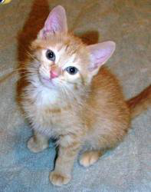

In [15]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [55]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

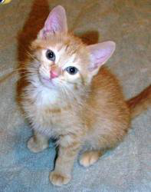

In [56]:
# can fake uploader too
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [57]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999995


In [29]:
# Deep Learning Is Not Just for Image Classification

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.209951,2.687418,00:02


epoch,train_loss,valid_loss,time
0,2.234238,1.929852,00:01
1,1.838789,1.617889,00:01
2,1.611629,1.233283,00:01
3,1.422477,1.127027,00:01
4,1.260034,0.948299,00:02
5,1.127263,0.899082,00:02
6,1.021470,0.830568,00:02
7,0.936676,0.821665,00:01


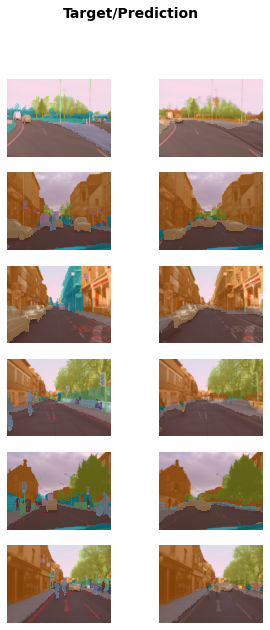

In [38]:
learn.show_results(max_n=6, figsize=(5,10))

In [39]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465391,0.398177,0.822160,03:21


epoch,train_loss,valid_loss,accuracy,time
0,0.308442,0.290625,0.873640,07:07
1,0.231778,0.287550,0.889880,07:07
2,0.173956,0.193412,0.927080,07:08
3,0.141857,0.196354,0.927960,07:08


In [46]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([1.1338e-04, 9.9989e-01]))

In [47]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [48]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.375264,0.363876,0.835074,00:04
1,0.349699,0.359448,0.832924,00:04
2,0.355246,0.356399,0.837224,00:04


In [49]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.516756,1.425544,00:00


epoch,train_loss,valid_loss,time
0,1.372150,1.365646,00:00
1,1.268247,1.183304,00:00
2,1.035593,0.873878,00:00
3,0.795005,0.727744,00:00
4,0.684894,0.692008,00:00
5,0.644649,0.679784,00:00
6,0.619020,0.675402,00:00
7,0.611120,0.672616,00:00
8,0.605151,0.671678,00:00
9,0.607102,0.671538,00:00


In [50]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,87.0,66.0,3.0,4.188083
1,10.0,47.0,4.5,4.451248
2,47.0,98.0,5.0,4.402793
3,52.0,54.0,5.0,4.314857
4,13.0,80.0,4.0,4.063411
5,26.0,95.0,3.0,4.207890
6,12.0,62.0,5.0,4.308624
7,35.0,83.0,3.5,3.101223
8,28.0,32.0,2.0,2.972439
